In [50]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [51]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [52]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [53]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [54]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [55]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=47a9492de94be05a37094596abe3157d


In [56]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [57]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | talcahuano
Processing Record 2 of Set 1 | williams lake
Processing Record 3 of Set 1 | borogontsy
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | susanville
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | srednekolymsk
Processing Record 8 of Set 1 | andros town
Processing Record 9 of Set 1 | meulaboh
Processing Record 10 of Set 1 | angra
City not found. Skipping...
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | marsa matruh
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | codrington
Processing Record 17 of Set 1 | auki
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | airai
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | cape town
Processing Record 23 of Set 1 | bluff
Processing Record 24 o

Processing Record 37 of Set 4 | salalah
Processing Record 38 of Set 4 | poum
Processing Record 39 of Set 4 | canora
Processing Record 40 of Set 4 | rorvik
Processing Record 41 of Set 4 | saint george
Processing Record 42 of Set 4 | road town
Processing Record 43 of Set 4 | sao miguel do araguaia
Processing Record 44 of Set 4 | santa ana
Processing Record 45 of Set 4 | det udom
Processing Record 46 of Set 4 | san juan
Processing Record 47 of Set 4 | starovelichkovskaya
Processing Record 48 of Set 4 | severo-kurilsk
Processing Record 49 of Set 4 | tadine
Processing Record 50 of Set 4 | esperance
Processing Record 1 of Set 5 | jumla
Processing Record 2 of Set 5 | victoria
Processing Record 3 of Set 5 | belmonte
Processing Record 4 of Set 5 | zakupne
Processing Record 5 of Set 5 | pilao arcado
City not found. Skipping...
Processing Record 6 of Set 5 | genhe
Processing Record 7 of Set 5 | provideniya
Processing Record 8 of Set 5 | nyrob
Processing Record 9 of Set 5 | mareeba
Processing Reco

Processing Record 27 of Set 8 | necochea
Processing Record 28 of Set 8 | vanderhoof
Processing Record 29 of Set 8 | yinchuan
Processing Record 30 of Set 8 | dudinka
Processing Record 31 of Set 8 | lumajang
Processing Record 32 of Set 8 | bonthe
Processing Record 33 of Set 8 | zboriv
Processing Record 34 of Set 8 | kifri
Processing Record 35 of Set 8 | boende
Processing Record 36 of Set 8 | camana
Processing Record 37 of Set 8 | puerto escondido
Processing Record 38 of Set 8 | jacksonville
Processing Record 39 of Set 8 | tiksi
Processing Record 40 of Set 8 | patacamaya
Processing Record 41 of Set 8 | tarko-sale
Processing Record 42 of Set 8 | stokmarknes
Processing Record 43 of Set 8 | nata
Processing Record 44 of Set 8 | pangnirtung
Processing Record 45 of Set 8 | najran
Processing Record 46 of Set 8 | sutto
Processing Record 47 of Set 8 | zhangjiakou
Processing Record 48 of Set 8 | warqla
City not found. Skipping...
Processing Record 49 of Set 8 | nara
Processing Record 50 of Set 8 | 

Processing Record 13 of Set 12 | bacuit
City not found. Skipping...
Processing Record 14 of Set 12 | northport
Processing Record 15 of Set 12 | claremore
Processing Record 16 of Set 12 | klaksvik
Processing Record 17 of Set 12 | kovur
Processing Record 18 of Set 12 | severnyy
Processing Record 19 of Set 12 | wyndham
Processing Record 20 of Set 12 | tirlyanskiy
Processing Record 21 of Set 12 | port hardy
Processing Record 22 of Set 12 | yerbogachen
Processing Record 23 of Set 12 | bubaque
Processing Record 24 of Set 12 | catuday
Processing Record 25 of Set 12 | batagay
Processing Record 26 of Set 12 | karratha
Processing Record 27 of Set 12 | igarape-miri
City not found. Skipping...
Processing Record 28 of Set 12 | qaqortoq
Processing Record 29 of Set 12 | helong
Processing Record 30 of Set 12 | san ignacio
Processing Record 31 of Set 12 | hofn
Processing Record 32 of Set 12 | morant bay
Processing Record 33 of Set 12 | aitape
Processing Record 34 of Set 12 | mendi
Processing Record 35 

In [75]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Talcahuano,-36.7167,-73.1167,59.00,77,0,8.05,CL,2021-05-15 21:13:29
1,Williams Lake,52.1415,-122.1445,73.99,34,75,3.44,CA,2021-05-15 21:13:30
2,Borogontsy,62.6683,131.1683,46.63,70,15,7.92,RU,2021-05-15 21:12:56
3,Mahebourg,-20.4081,57.7000,77.00,78,40,13.80,MU,2021-05-15 21:13:30
4,Susanville,40.4163,-120.6530,51.80,82,40,11.50,US,2021-05-15 21:11:45
5,Avarua,-21.2078,-159.7750,80.60,74,75,10.36,CK,2021-05-15 21:13:31
6,Srednekolymsk,67.4500,153.6833,32.79,84,6,8.10,RU,2021-05-15 21:13:31
7,Andros Town,24.7000,-77.7667,82.40,65,40,12.66,BS,2021-05-15 21:13:31
8,Meulaboh,4.1363,96.1285,77.50,89,98,3.91,ID,2021-05-15 21:13:32
9,Ushuaia,-54.8000,-68.3000,44.60,65,20,5.75,AR,2021-05-15 21:09:02


In [59]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Talcahuano,CL,2021-05-15 21:13:29,-36.7167,-73.1167,59.00,77,0,8.05
1,Williams Lake,CA,2021-05-15 21:13:30,52.1415,-122.1445,73.99,34,75,3.44
2,Borogontsy,RU,2021-05-15 21:12:56,62.6683,131.1683,46.63,70,15,7.92
3,Mahebourg,MU,2021-05-15 21:13:30,-20.4081,57.7000,77.00,78,40,13.80
4,Susanville,US,2021-05-15 21:11:45,40.4163,-120.6530,51.80,82,40,11.50
5,Avarua,CK,2021-05-15 21:13:31,-21.2078,-159.7750,80.60,74,75,10.36
6,Srednekolymsk,RU,2021-05-15 21:13:31,67.4500,153.6833,32.79,84,6,8.10
7,Andros Town,BS,2021-05-15 21:13:31,24.7000,-77.7667,82.40,65,40,12.66
8,Meulaboh,ID,2021-05-15 21:13:32,4.1363,96.1285,77.50,89,98,3.91
9,Ushuaia,AR,2021-05-15 21:09:02,-54.8000,-68.3000,44.60,65,20,5.75


In [60]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [61]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

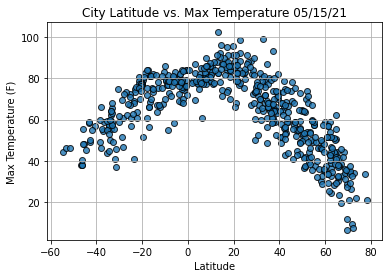

In [62]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

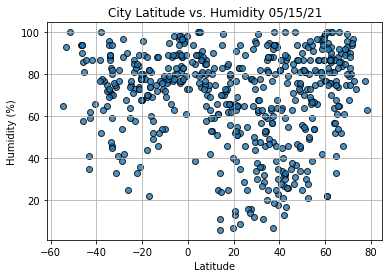

In [63]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

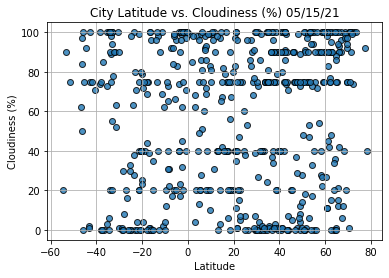

In [64]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

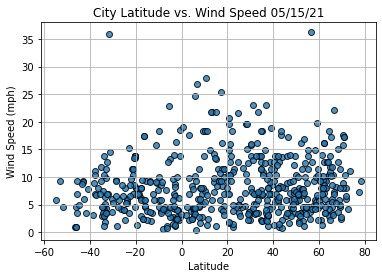

In [65]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [66]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [67]:
#examples-get a specific row from a current DataFrame is row = df.loc[row_index].
index13 = city_data_df.loc[13]
index13

City                 Puerto Ayora
Country                        EC
Date          2021-05-15 21:11:19
Lat                       -0.7393
Lng                      -90.3518
Max Temp                     84.2
Humidity                       61
Cloudiness                     40
Wind Speed                   13.8
Name: 13, dtype: object

In [68]:
#examples-Northern Hemisphere latitudes, for latitudes greater than or equal to 0
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
545     True
546     True
547     True
548     True
549     True
Name: Lat, Length: 550, dtype: bool

In [69]:
#examples-return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Williams Lake,CA,2021-05-15 21:13:30,52.1415,-122.1445,73.99,34,75,3.44
2,Borogontsy,RU,2021-05-15 21:12:56,62.6683,131.1683,46.63,70,15,7.92
4,Susanville,US,2021-05-15 21:11:45,40.4163,-120.6530,51.80,82,40,11.50
6,Srednekolymsk,RU,2021-05-15 21:13:31,67.4500,153.6833,32.79,84,6,8.10
7,Andros Town,BS,2021-05-15 21:13:31,24.7000,-77.7667,82.40,65,40,12.66


In [70]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

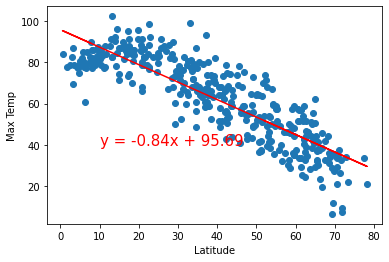

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

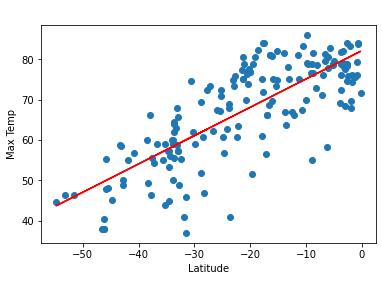

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

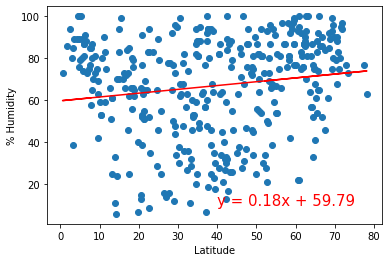

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

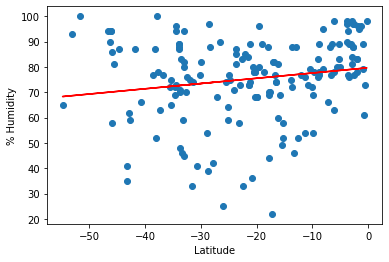

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

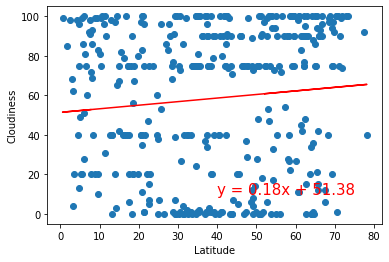

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,10))

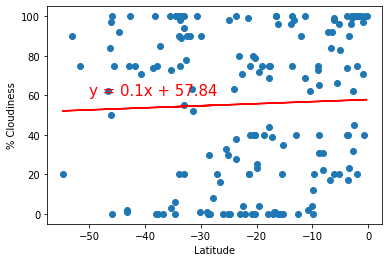

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

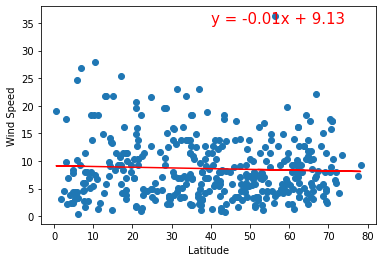

In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

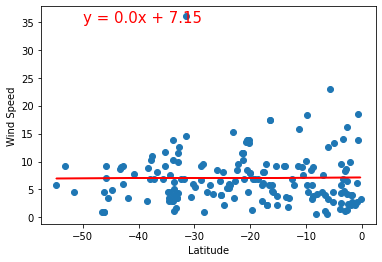

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))